# Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Pre-processing

In [8]:
data = pd.read_csv("/kaggle/input/agencyperformance/finalapi.csv")
threshold = 1000  # For example, you may consider 'high retention' if RETENTION_POLY_QTY > 1000, otherwise 'low retention'

# Create a new binary target variable based on the threshold
data['target_variable'] = np.where(data['RETENTION_POLY_QTY'] > threshold, 1, 0)

x = data[['STAT_PROFILE_DATE_YEAR', 'NB_WRTN_PREM_AMT']].values  # Extracting features (columns 2 and 3) into variable x
y = data['target_variable'].values  # Extracting target variable (column 4) into variable y

# Importing dataset into a DataFrame (assuming 'dataset' is your dataset)
df = pd.DataFrame(data)

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)
print(x_train)

[[-0.06140133 -0.06540313]
 [ 0.25827481 -0.22383849]
 [ 0.25827481 -0.22383849]
 ...
 [ 0.57795094  0.48174301]
 [-1.02042974 -0.22383849]
 [ 0.57795094 -0.22383849]]


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier( criterion = 'entropy' , random_state = 0 )
classifier.fit( x_train , y_train )

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting The Test Result

In [11]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


# Creation of Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49916  1287]
 [ 1579   550]]


# Training Set Visualization

/tmp/ipykernel_33/2924405571.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


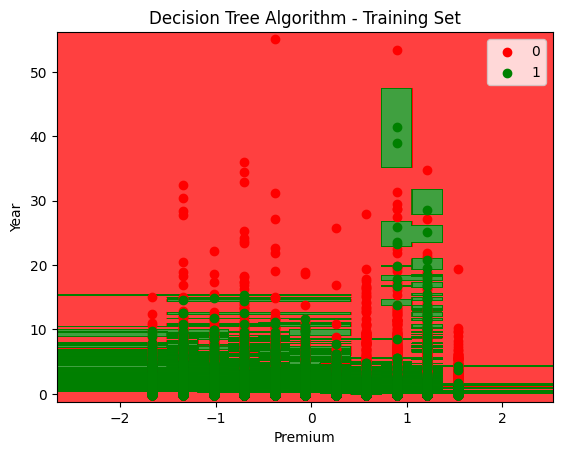

In [19]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Algorithm - Training Set')
plt.xlabel('Premium')
plt.ylabel('Year')
plt.legend()
plt.show()

# Testing Set Visualization

/tmp/ipykernel_33/4045998429.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


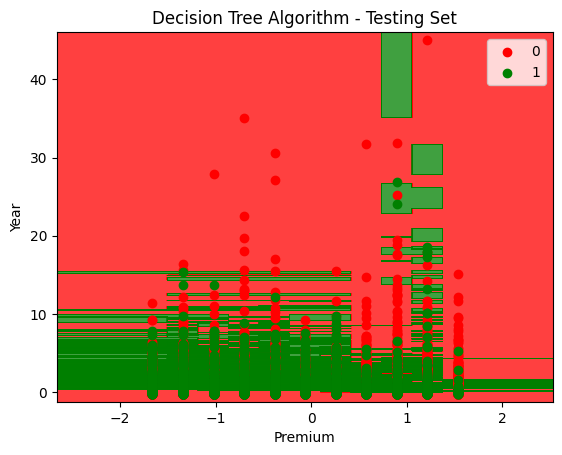

In [20]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Algorithm - Testing Set')
plt.xlabel('Premium')
plt.ylabel('Year')
plt.legend()
plt.show()